In [5]:
import pandas as pd

irtDf = pd.read_csv('/home/yram0006/phd/chapter_1/workspace/EHRQC/temp/mimic_vitals_irt.csv')
irtDf

,Unnamed: 0,heartrate,sysbp,diabp,meanbp,resprate,tempc,spo2,gcseye,gcsverbal,gcsmotor,y_knn_agg,y_lof,y_inflo,y_kdeos,y_ldf,ensemble_scores
0,0,106.840000,136.088235,67.794118,87.060606,14.166667,37.500000,96.640000,3.312500,3.187500,5.812500,190.507884,0.993918,0.908445,0.030531,0.557708,3.329907
1,1,81.680000,134.920000,56.160000,79.120000,19.595745,37.006944,98.960000,3.714286,3.571429,5.714286,184.218969,1.073082,1.070227,0.732589,0.633398,4.260566
2,2,89.958333,105.750000,55.625000,65.083333,14.708333,35.912698,99.791667,3.600000,1.000000,3.000000,218.739345,1.356232,1.227797,0.817824,0.734950,5.613727
3,3,86.423729,92.703704,56.481481,64.666667,25.627119,37.375000,95.610169,4.000000,5.000000,6.000000,169.255517,1.088557,0.935266,0.270524,0.712052,4.317812
4,4,75.520000,107.900000,58.400000,72.533333,13.875000,36.388889,98.360000,3.166667,3.666667,5.166667,110.792994,0.973683,0.879577,0.051264,0.475917,2.559827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76443,76443,59.884615,135.571429,87.714286,87.433333,15.807692,36.101852,94.200000,4.000000,5.000000,6.000000,423.193352,1.822289,0.769496,0.592560,0.971693,7.344202
76444,76444,70.840000,155.125000,50.416667,81.416667,18.040000,36.629630,98.160000,4.000000,5.000000,6.000000,258.673933,1.092700,1.055626,0.442170,0.543033,4.382040
76445,76445,85.125000,121.593750,63.375000,82.968750,14.810811,36.777778,98.142857,2.750000,3.000000,4.750000,144.222677,1.018718,0.932773,0.209790,0.575459,3.504560
76446,76446,101.440000,136.384615,79.461538,95.615385,16.728753,36.731481,93.800000,4.000000,5.000000,6.000000,182.070995,1.038375,0.959326,0.796110,0.695990,4.099228


<AxesSubplot:>

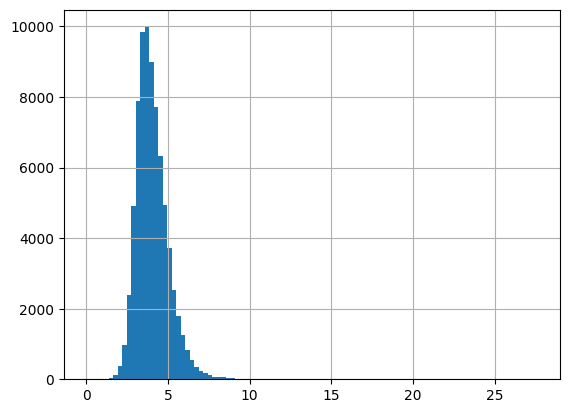

In [8]:
irtDf.ensemble_scores.hist(bins=100)

In [24]:
import os, tempfile, subprocess
import pandas as pd


def irt_ensemble(data):

    inFile = tempfile.NamedTemporaryFile(delete=False)
    outFile = tempfile.NamedTemporaryFile(delete=False)
    try:
        data.to_csv(inFile, index=False)
        subprocess.call (["/usr/bin/Rscript", "--vanilla", "/home/yram0006/phd/chapter_1/workspace/EHRQC/ehrqc/qc/script.r", inFile.name, outFile.name])

        if outFile:
            try:
                out = pd.read_csv(outFile)
            except:
                out = None
        else:
            out = None

    finally:
        inFile.close()
        outFile.close()
        os.unlink(inFile.name)
        os.unlink(outFile.name)

    return out

In [26]:
import itertools


colNames = ['sysbp', 'diabp', 'meanbp', 'resprate', 'tempc', 'spo2', 'gcseye', 'gcsverbal', 'gcsmotor']

for (x, y) in itertools.combinations(colNames, 2):
    if x in irtDf.columns and y in irtDf.columns:
        try:
            anomalyDf = irt_ensemble(irtDf[[x, y]])
            irtDf['ensemble_scores_' + x + y] = anomalyDf.ensemble_scores
        except:
            continue

Warning messages:
1: In sqrt(diag(solve(Hess))) : NaNs produced
2: In sqrt(diag(solve(Hess))) : NaNs produced
Warning messages:
1: In sqrt(diag(solve(Hess))) : NaNs produced
2: In sqrt(diag(solve(Hess))) : NaNs produced
Warning message:
In sqrt(diag(solve(Hess))) : NaNs produced
Error in while (abs(d) > converge && iter < max.EMCycle) { : 
  missing value where TRUE/FALSE needed
Calls: detect_anomalies -> <Anonymous> -> <Anonymous> -> EstCRMitem2
In addition: There were 16 warnings (use warnings() to see them)
Execution halted
Warning message:
In sqrt(diag(solve(Hess))) : NaNs produced
Error in while (abs(d) > converge && iter < max.EMCycle) { : 
  missing value where TRUE/FALSE needed
Calls: detect_anomalies -> <Anonymous> -> <Anonymous> -> EstCRMitem2
In addition: There were 16 warnings (use warnings() to see them)
Execution halted
Error in while (abs(d) > converge && iter < max.EMCycle) { : 
  missing value where TRUE/FALSE needed
Calls: detect_anomalies -> <Anonymous> -> <Anonymous

In [27]:
irtDf

,Unnamed: 0,heartrate,sysbp,diabp,meanbp,resprate,tempc,spo2,gcseye,gcsverbal,...,y_ldf,ensemble_scores,ensemble_scores_sysbpdiabp,ensemble_scores_sysbpmeanbp,ensemble_scores_sysbpresprate,ensemble_scores_sysbpspo2,ensemble_scores_diabpmeanbp,ensemble_scores_diabpresprate,ensemble_scores_meanbpresprate,ensemble_scores_meanbptempc
0,0,106.840000,136.088235,67.794118,87.060606,14.166667,37.500000,96.640000,3.312500,3.187500,...,0.557708,3.329907,8.349746,9.814182,5.634120,9.488621,11.792855,4.890767,7.265080,7.564140
1,1,81.680000,134.920000,56.160000,79.120000,19.595745,37.006944,98.960000,3.714286,3.571429,...,0.633398,4.260566,6.719914,9.060071,6.597770,6.860826,10.789319,5.570802,9.293233,7.652426
2,2,89.958333,105.750000,55.625000,65.083333,14.708333,35.912698,99.791667,3.600000,1.000000,...,0.734950,5.613727,7.227108,8.726630,5.894792,5.555751,11.751999,5.405766,10.114235,8.417259
3,3,86.423729,92.703704,56.481481,64.666667,25.627119,37.375000,95.610169,4.000000,5.000000,...,0.712052,4.317812,7.372769,9.232962,7.783435,5.171443,12.176689,4.757472,9.605074,9.146440
4,4,75.520000,107.900000,58.400000,72.533333,13.875000,36.388889,98.360000,3.166667,3.666667,...,0.475917,2.559827,8.273841,12.077572,8.425612,5.371057,10.801386,5.249639,7.892283,7.830969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76443,76443,59.884615,135.571429,87.714286,87.433333,15.807692,36.101852,94.200000,4.000000,5.000000,...,0.971693,7.344202,6.824736,9.476520,5.846172,7.041785,13.775080,4.775863,9.689971,7.815099
76444,76444,70.840000,155.125000,50.416667,81.416667,18.040000,36.629630,98.160000,4.000000,5.000000,...,0.543033,4.382040,6.727420,10.945474,7.356000,6.456659,10.761927,6.652185,8.973396,8.126410
76445,76445,85.125000,121.593750,63.375000,82.968750,14.810811,36.777778,98.142857,2.750000,3.000000,...,0.575459,3.504560,8.050912,9.130143,7.443026,5.602654,11.536623,6.163542,8.741424,12.893801
76446,76446,101.440000,136.384615,79.461538,95.615385,16.728753,36.731481,93.800000,4.000000,5.000000,...,0.695990,4.099228,7.312308,8.709969,7.763708,5.374301,12.016540,6.272617,8.965711,7.855145


/home/yram0006/phd/chapter_1/workspace/EHRQC/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/yram0006/phd/chapter_1/workspace/EHRQC/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/yram0006/phd/chapter_1/workspace/EHRQC/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version

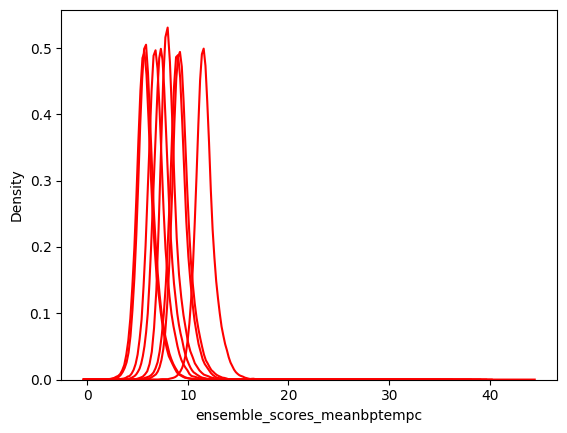

In [35]:
# irtDf.ensemble_scores_sysbpdiabp.hist(bins=100)
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

for colName in irtDf.columns:
    if colName.startswith('ensemble_scores_'):
        # irtDf.ensemble_scores_sysbpdiabp.hist(bins=100)
        # print(colName)
        sns.distplot(irtDf[colName], hist=False, color='red', ax=ax)

/home/yram0006/phd/chapter_1/workspace/EHRQC/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ensemble_scores', ylabel='Density'>

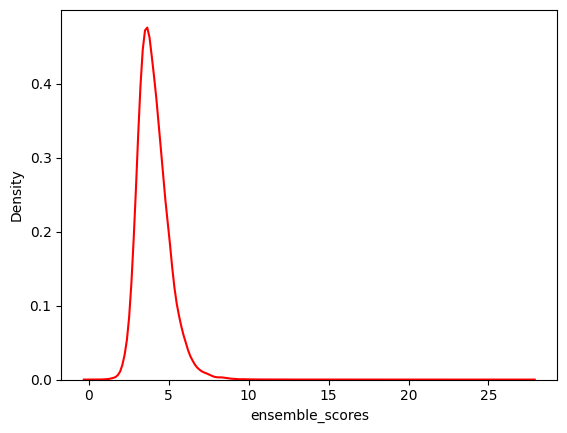

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.distplot(irtDf['ensemble_scores'], hist=False, color='red', ax=ax)

<AxesSubplot:xlabel='heartrate', ylabel='sysbp'>

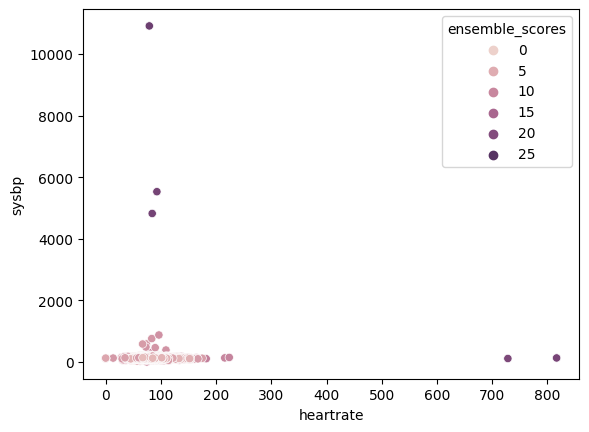

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.scatterplot(data=irtDf, x='heartrate', y='sysbp', hue='ensemble_scores', hue_norm=(0,30))

In [71]:
Q1 = irtDf.ensemble_scores.quantile(0.25)
Q3 = irtDf.ensemble_scores.quantile(0.75)
IQR = Q3 - Q1

cleanIrtDf = irtDf[~((irtDf.ensemble_scores < (Q1 - 1.5 * IQR)) | (irtDf.ensemble_scores > (Q3 + 1.5 * IQR)))]
cleanIrtDf

,Unnamed: 0,heartrate,sysbp,diabp,meanbp,resprate,tempc,spo2,gcseye,gcsverbal,...,y_ldf,ensemble_scores,ensemble_scores_sysbpdiabp,ensemble_scores_sysbpmeanbp,ensemble_scores_sysbpresprate,ensemble_scores_sysbpspo2,ensemble_scores_diabpmeanbp,ensemble_scores_diabpresprate,ensemble_scores_meanbpresprate,ensemble_scores_meanbptempc
0,0,106.840000,136.088235,67.794118,87.060606,14.166667,37.500000,96.640000,3.312500,3.187500,...,0.557708,3.329907,8.349746,9.814182,5.634120,9.488621,11.792855,4.890767,7.265080,7.564140
1,1,81.680000,134.920000,56.160000,79.120000,19.595745,37.006944,98.960000,3.714286,3.571429,...,0.633398,4.260566,6.719914,9.060071,6.597770,6.860826,10.789319,5.570802,9.293233,7.652426
2,2,89.958333,105.750000,55.625000,65.083333,14.708333,35.912698,99.791667,3.600000,1.000000,...,0.734950,5.613727,7.227108,8.726630,5.894792,5.555751,11.751999,5.405766,10.114235,8.417259
3,3,86.423729,92.703704,56.481481,64.666667,25.627119,37.375000,95.610169,4.000000,5.000000,...,0.712052,4.317812,7.372769,9.232962,7.783435,5.171443,12.176689,4.757472,9.605074,9.146440
4,4,75.520000,107.900000,58.400000,72.533333,13.875000,36.388889,98.360000,3.166667,3.666667,...,0.475917,2.559827,8.273841,12.077572,8.425612,5.371057,10.801386,5.249639,7.892283,7.830969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76442,76442,101.800000,124.640000,68.960000,81.400000,17.880000,36.780556,95.960000,4.000000,5.000000,...,0.521780,3.181932,9.443787,10.295728,7.049317,7.388611,10.327549,6.566881,8.922911,9.568933
76444,76444,70.840000,155.125000,50.416667,81.416667,18.040000,36.629630,98.160000,4.000000,5.000000,...,0.543033,4.382040,6.727420,10.945474,7.356000,6.456659,10.761927,6.652185,8.973396,8.126410
76445,76445,85.125000,121.593750,63.375000,82.968750,14.810811,36.777778,98.142857,2.750000,3.000000,...,0.575459,3.504560,8.050912,9.130143,7.443026,5.602654,11.536623,6.163542,8.741424,12.893801
76446,76446,101.440000,136.384615,79.461538,95.615385,16.728753,36.731481,93.800000,4.000000,5.000000,...,0.695990,4.099228,7.312308,8.709969,7.763708,5.374301,12.016540,6.272617,8.965711,7.855145


<AxesSubplot:xlabel='heartrate', ylabel='sysbp'>

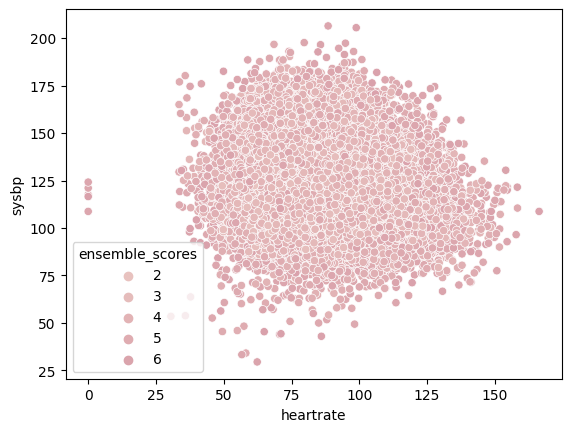

In [72]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.scatterplot(data=cleanIrtDf, x='heartrate', y='sysbp', hue='ensemble_scores', hue_norm=(0,30))

In [77]:
cleanIqcDf = irtDf
for colName in ['heartrate', 'sysbp', 'diabp', 'meanbp', 'resprate', 'tempc', 'spo2', 'gcseye', 'gcsverbal', 'gcsmotor']:
    Q1 = irtDf[colName].quantile(0.25)
    Q3 = irtDf[colName].quantile(0.75)
    IQR = Q3 - Q1
    cleanIqcDf = cleanIqcDf[~((cleanIqcDf[colName] < (Q1 - 1.5 * IQR)) | (cleanIqcDf[colName] > (Q3 + 1.5 * IQR)))]
cleanIqcDf

,Unnamed: 0,heartrate,sysbp,diabp,meanbp,resprate,tempc,spo2,gcseye,gcsverbal,...,y_ldf,ensemble_scores,ensemble_scores_sysbpdiabp,ensemble_scores_sysbpmeanbp,ensemble_scores_sysbpresprate,ensemble_scores_sysbpspo2,ensemble_scores_diabpmeanbp,ensemble_scores_diabpresprate,ensemble_scores_meanbpresprate,ensemble_scores_meanbptempc
0,0,106.840000,136.088235,67.794118,87.060606,14.166667,37.500000,96.640000,3.312500,3.187500,...,0.557708,3.329907,8.349746,9.814182,5.634120,9.488621,11.792855,4.890767,7.265080,7.564140
1,1,81.680000,134.920000,56.160000,79.120000,19.595745,37.006944,98.960000,3.714286,3.571429,...,0.633398,4.260566,6.719914,9.060071,6.597770,6.860826,10.789319,5.570802,9.293233,7.652426
3,3,86.423729,92.703704,56.481481,64.666667,25.627119,37.375000,95.610169,4.000000,5.000000,...,0.712052,4.317812,7.372769,9.232962,7.783435,5.171443,12.176689,4.757472,9.605074,9.146440
4,4,75.520000,107.900000,58.400000,72.533333,13.875000,36.388889,98.360000,3.166667,3.666667,...,0.475917,2.559827,8.273841,12.077572,8.425612,5.371057,10.801386,5.249639,7.892283,7.830969
5,5,63.040000,110.625000,57.375000,69.208333,26.038462,36.857143,96.461538,4.000000,5.000000,...,0.847038,5.407398,7.908011,8.802710,7.329625,6.396743,12.213979,5.074915,8.176639,6.832347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76443,76443,59.884615,135.571429,87.714286,87.433333,15.807692,36.101852,94.200000,4.000000,5.000000,...,0.971693,7.344202,6.824736,9.476520,5.846172,7.041785,13.775080,4.775863,9.689971,7.815099
76444,76444,70.840000,155.125000,50.416667,81.416667,18.040000,36.629630,98.160000,4.000000,5.000000,...,0.543033,4.382040,6.727420,10.945474,7.356000,6.456659,10.761927,6.652185,8.973396,8.126410
76445,76445,85.125000,121.593750,63.375000,82.968750,14.810811,36.777778,98.142857,2.750000,3.000000,...,0.575459,3.504560,8.050912,9.130143,7.443026,5.602654,11.536623,6.163542,8.741424,12.893801
76446,76446,101.440000,136.384615,79.461538,95.615385,16.728753,36.731481,93.800000,4.000000,5.000000,...,0.695990,4.099228,7.312308,8.709969,7.763708,5.374301,12.016540,6.272617,8.965711,7.855145


<AxesSubplot:xlabel='heartrate', ylabel='sysbp'>

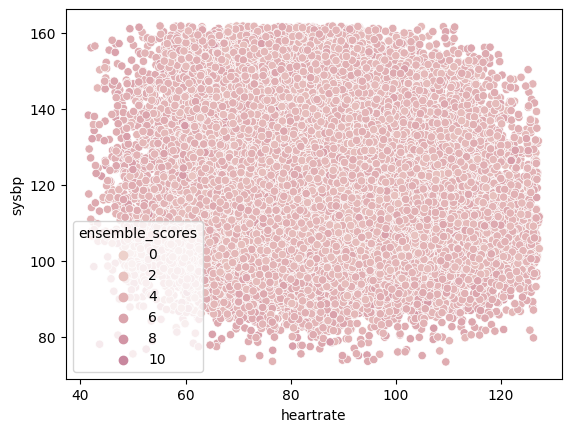

In [78]:
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.scatterplot(
    data=cleanIqcDf,
    x='heartrate',
    y='sysbp',
    hue='ensemble_scores',
    hue_norm=(0,30)
    )
